<a href="https://colab.research.google.com/github/Mansi06Salar/Coronary-Artery-Disease-Detection-using-AI/blob/main/Ensemble_Stacking_based.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import time
from collections import Counter
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
df = pd.read_csv("Reduced_Dataset_Hybrid_Approach.csv")

# Fix LightGBM warning: Remove spaces from feature names
df.columns = [col.replace(" ", "_") for col in df.columns]

In [ ]:
X = df.drop(columns=['CAD'])
y = df['CAD']

In [ ]:
print("Class Distribution BEFORE SMOTE:", Counter(y))

Class Distribution BEFORE SMOTE: Counter({1: 216, 0: 87})


In [ ]:
#SMOTE if needed
imbalance_threshold = 0.6
class_counts = Counter(y)
minority_class = min(class_counts, key=class_counts.get)
majority_class = max(class_counts, key=class_counts.get)
imbalance_ratio = class_counts[minority_class] / class_counts[majority_class]

if imbalance_ratio < imbalance_threshold:
    smote = SMOTE(random_state=42)
    X, y = smote.fit_resample(X, y)
    print("Class Distribution AFTER SMOTE:", Counter(y))

Class Distribution AFTER SMOTE: Counter({1: 216, 0: 216})


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)),
    ('xgb', XGBClassifier(eval_metric='logloss', random_state=42)),
    ('lgbm', LGBMClassifier(max_depth=10, min_data_in_leaf=5, random_state=42)),
    ('cat', CatBoostClassifier(verbose=0, random_state=42)),
    ('extratrees', ExtraTreesClassifier(n_estimators=100, random_state=42)),
    ('svm', SVC(probability=True, random_state=42)),
]


In [ ]:
meta_model = RandomForestClassifier(n_estimators=100, random_state=42)

stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=StratifiedKFold(n_splits=5)
)

In [ ]:
start_time = time.time()
stacking_model.fit(X_train, y_train)
train_time = time.time() - start_time

[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Info] Number of positive: 173, number of negative: 172
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000535 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 984
[LightGBM] [Info] Number of data points in the train set: 345, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501449 -> initscore=0.005797
[LightGBM] [Info] Start training from score 0.005797
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warn

In [ ]:
y_pred = stacking_model.predict(X_test)
y_prob = stacking_model.predict_proba(X_test)[:, 1]

[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

In [ ]:
print("\nStacking Ensemble Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUROC: {auc:.4f}")
print(f"Train Time: {train_time:.4f} seconds")


Stacking Ensemble Performance:
Accuracy: 0.9080
Precision: 0.9268
Recall: 0.8837
F1 Score: 0.9048
AUROC: 0.9474
Train Time: 20.4643 seconds


In [ ]:
#Stacking on all Classifiers, top 3 classifiers (on full and reduced dataset)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.feature_selection import SelectKBest, f_classif


# Load the dataset
df = pd.read_csv('new_data (2).csv')
df.columns = [col.replace(" ", "_") for col in df.columns]
df = df.fillna(df.median())

# Define features (X) and target (y)
X = df.drop(columns=['CAD'])
y = df['CAD']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define all models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'XGBoost': xgb.XGBClassifier(eval_metric='logloss'),
    'CatBoost': CatBoostClassifier(learning_rate=0.1, iterations=500, depth=6, verbose=0),
    'LightGBM': lgb.LGBMClassifier(force_col_wise=True),
    'AdaBoost': AdaBoostClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Create and train stacking model with all classifiers
estimators = [(name, model) for name, model in models.items()]
stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_model.fit(X_train, y_train)


# Select top 3 models
top_3_models = ['CatBoost', 'LightGBM', 'XGBoost']

# Create and train stacking model with top 3 classifiers
top_3_estimators = [(name, models[name]) for name in top_3_models]
stacking_model_top3 = StackingClassifier(estimators=top_3_estimators, final_estimator=LogisticRegression())
stacking_model_top3.fit(X_train, y_train)

# Feature selection for reduced dataset (using SelectKBest)
selector = SelectKBest(f_classif, k=5)  # Select top 5 features
X_train_reduced = selector.fit_transform(X_train, y_train)
X_test_reduced = selector.transform(X_test)

# Train and evaluate top 3 stacking model on reduced dataset
stacking_model_top3_reduced = StackingClassifier(estimators=top_3_estimators, final_estimator=LogisticRegression())
stacking_model_top3_reduced.fit(X_train_reduced, y_train)


# --- Evaluate with multiple metrics ---

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-score: {f1:.4f}")
    print(f"  ROC AUC: {roc_auc:.4f}")
    print("-" * 20)  # Separator


print("Stacking Model (All Classifiers) Evaluation:")
evaluate_model(stacking_model, X_test, y_test)

print("Stacking Model (Top 3, Full Dataset) Evaluation:")
evaluate_model(stacking_model_top3, X_test, y_test)

print("Stacking Model (Top 3, Reduced Dataset) Evaluation:")
evaluate_model(stacking_model_top3_reduced, X_test_reduced, y_test)

[LightGBM] [Info] Number of positive: 173, number of negative: 69
[LightGBM] [Info] Total Bins 837
[LightGBM] [Info] Number of data points in the train set: 242, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.714876 -> initscore=0.919185
[LightGBM] [Info] Start training from score 0.919185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 173, number of negative: 69
[LightGBM] [Info] Total Bins 50
[LightGBM] [Info] Number of data points in the train set: 242, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.714876 -> initscore=0.919185
[LightGBM] [Info] Start training from score 0.919185
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Number of positive: 138, number of negative: 55
[LightGBM] [Info] Total Bins 46
[LightGBM] [Info] Number of data points in the train set: 193, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.715026 -> initscore=0.919920
[LightGBM] [Info] Start training from score 0.919920
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
#Graphs

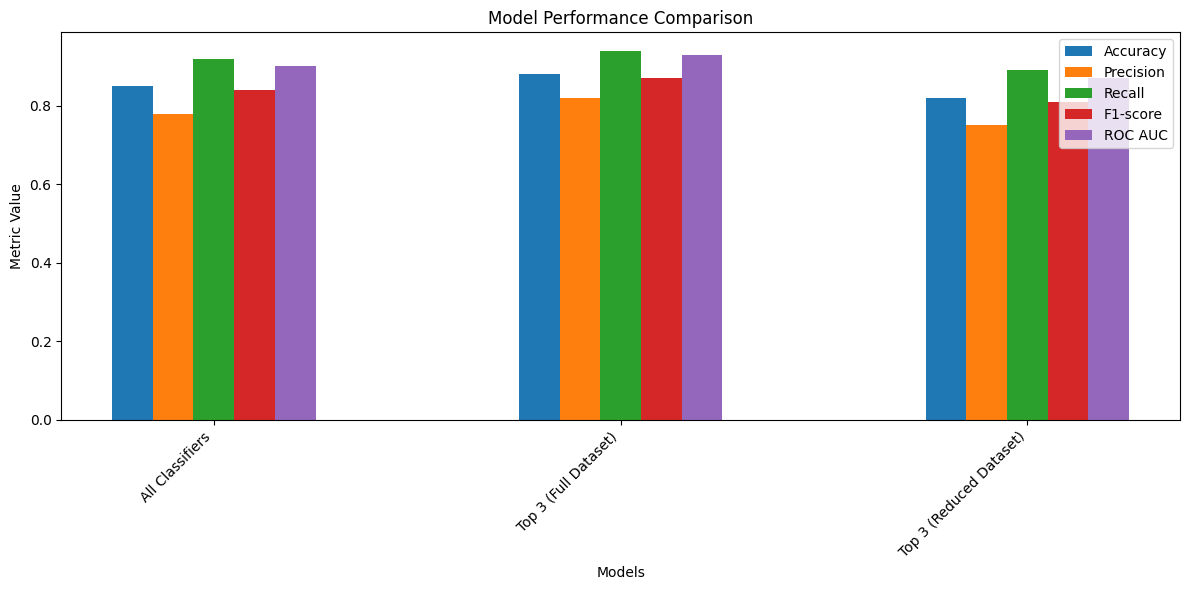

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_metrics(metrics, model_names):
    """Plots accuracy, precision, recall, F1-score, and ROC AUC for multiple models."""

    # Extract metrics
    accuracy = [m[0] for m in metrics]
    precision = [m[1] for m in metrics]
    recall = [m[2] for m in metrics]
    f1 = [m[3] for m in metrics]
    roc_auc = [m[4] for m in metrics]

    # Create the figure and axes
    fig, ax = plt.subplots(figsize=(12, 6))

    # Define the X-axis positions for the bars
    x_pos = np.arange(len(model_names))

    # Plot the metrics as bars
    ax.bar(x_pos - 0.2, accuracy, width=0.1, label='Accuracy')
    ax.bar(x_pos - 0.1, precision, width=0.1, label='Precision')
    ax.bar(x_pos, recall, width=0.1, label='Recall')
    ax.bar(x_pos + 0.1, f1, width=0.1, label='F1-score')
    ax.bar(x_pos + 0.2, roc_auc, width=0.1, label='ROC AUC')

    # Set the labels and title
    ax.set_xlabel('Models')
    ax.set_ylabel('Metric Value')
    ax.set_title('Model Performance Comparison')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(model_names, rotation=45, ha='right')
    ax.legend()

    # Display the plot
    plt.tight_layout()
    plt.show()


# Example usage:
metrics = [
    [0.85, 0.78, 0.92, 0.84, 0.90],  # Metrics for model 1
    [0.88, 0.82, 0.94, 0.87, 0.93],  # Metrics for model 2
    [0.82, 0.75, 0.89, 0.81, 0.87],  # Metrics for model 3
]

model_names = ['All Classifiers', 'Top 3 (Full Dataset)', 'Top 3 (Reduced Dataset)']

plot_metrics(metrics, model_names)